In [1]:
# Importing the packages

import numpy as np 
import pandas as pd 
import os
import cv2

import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#  Mounting to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# cd /content/gdrive/MyDrive/Drowsiness_detection

/content/gdrive/MyDrive/Drowsiness_detection


In [4]:
plt.style.use('dark_background')

In [5]:
# Plotting the images in the directories
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 


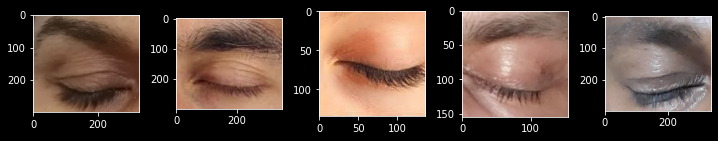

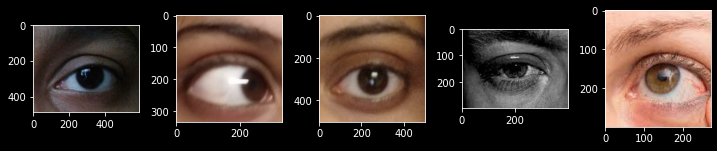

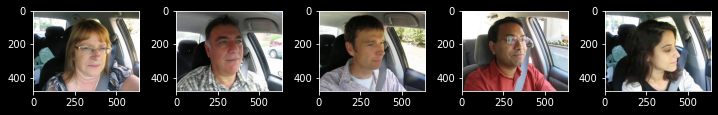

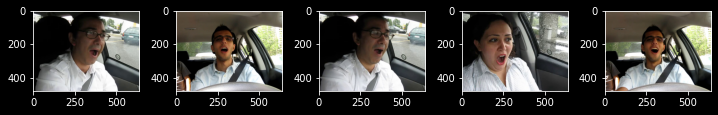

In [8]:
# calling the above function
data_path = '/content/gdrive/MyDrive/Drowsiness_detection/dataset/train'
directories = ['/Closed', '/Open', '/no_yawn', '/yawn']
for j in directories:
    plot_imgs(data_path+j)

In [9]:
# Image generator/Image preprocessing
batch_size = 128
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1)
# train_datagen = ImageDataGenerator(
#                     rescale=1./255,
#                     rotation_range=30,
#                     zoom_range = 0.2
#                     width_shift_range=0.3,
#                     height_shift_range=0.3,
#                     horizontal_flip=True,
#                     fill_mode='nearest'
                                   )
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
train_data_path = '/content/gdrive/MyDrive/Drowsiness_detection/dataset/train'
test_data_path = '/content/gdrive/MyDrive/Drowsiness_detection/dataset/test'

print("Images in the train Dataset")
train_set = train_datagen.flow_from_directory(train_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')
print("Images in the test Dataset")
test_set = test_datagen.flow_from_directory(test_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

Images in the train Dataset
Found 2467 images belonging to 4 classes.
Images in the test Dataset
Found 433 images belonging to 4 classes.


In [13]:
# Building the model
classes = 4

model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (256,256,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))

model.add(Dense(classes, activation = 'softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [19]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
model_path="/content/gdrive/MyDrive/Drowsiness_detection/models/drowsiness_detection.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]


In [20]:
num_epochs = 10
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

In [21]:
print("Train\n",training_steps)
print("Test\n",validation_steps)

Train
 19
Test
 3


In [22]:
print("Train images\n",train_set.n);print("batch_size\n",train_set.batch_size)

Train images
 2467
batch_size
 128


In [23]:
history = model.fit_generator(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 1.3003 - accuracy: 0.3903 
Epoch 1: val_accuracy improved from -inf to 0.72396, saving model to /content/gdrive/MyDrive/Drowsiness_detection/models/drowsiness_detection.h5
19/19 [==============================] - 538s 28s/step - loss: 1.3003 - accuracy: 0.3903 - val_loss: 0.7248 - val_accuracy: 0.7240
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 0.6035 - accuracy: 0.7238
Epoch 2: val_accuracy did not improve from 0.72396
19/19 [==============================] - 33s 2s/step - loss: 0.6035 - accuracy: 0.7238 - val_loss: 0.6146 - val_accuracy: 0.6641
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 0.5121 - accuracy: 0.7452
Epoch 3: val_accuracy did not improve from 0.72396
19/19 [==============================] - 34s 2s/step - loss: 0.5121 - accuracy: 0.7452 - val_loss: 0.6071 - val_accuracy: 0.7083
Epoch 4/10
19/19 [==============================] - ETA: 0s - loss: 0.4354 - accu

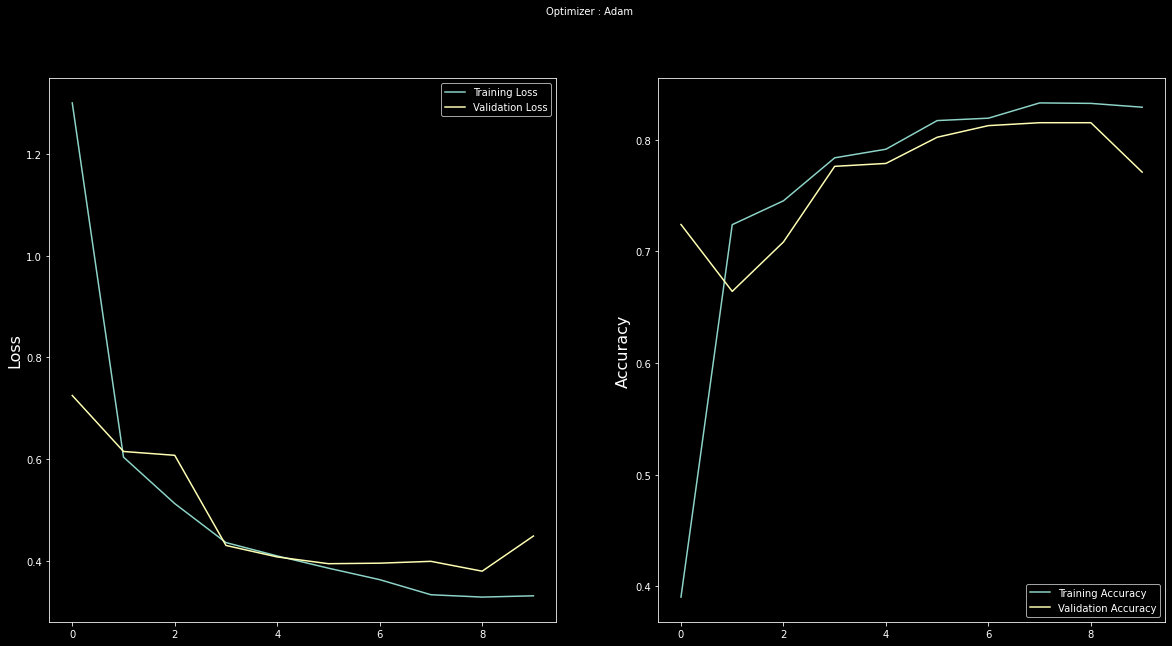

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# plotting accuracy and loss curve for training
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()